In [1]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
all_samples=read.table("normal_sample_annovar_annotation_clinical_filter.csv",sep=",",quote="\"",header=T)

In [ ]:

selected_data <- all_samples[, c("Sample", "ExonicFunc.refGene")]

In [7]:
result <- selected_data %>%
  group_by(Sample) %>%
  summarise(
    nonsynonymous_count = sum(ExonicFunc.refGene == "nonsynonymous SNV", na.rm = TRUE),
    synonymous_count = sum(ExonicFunc.refGene == "synonymous SNV", na.rm = TRUE),
    ratio = nonsynonymous_count / synonymous_count
  )

In [ ]:

df_clean <- result %>%
  filter(!is.nan(ratio), !is.infinite(ratio))
summary(df_clean$ratio)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0       0       0       0 

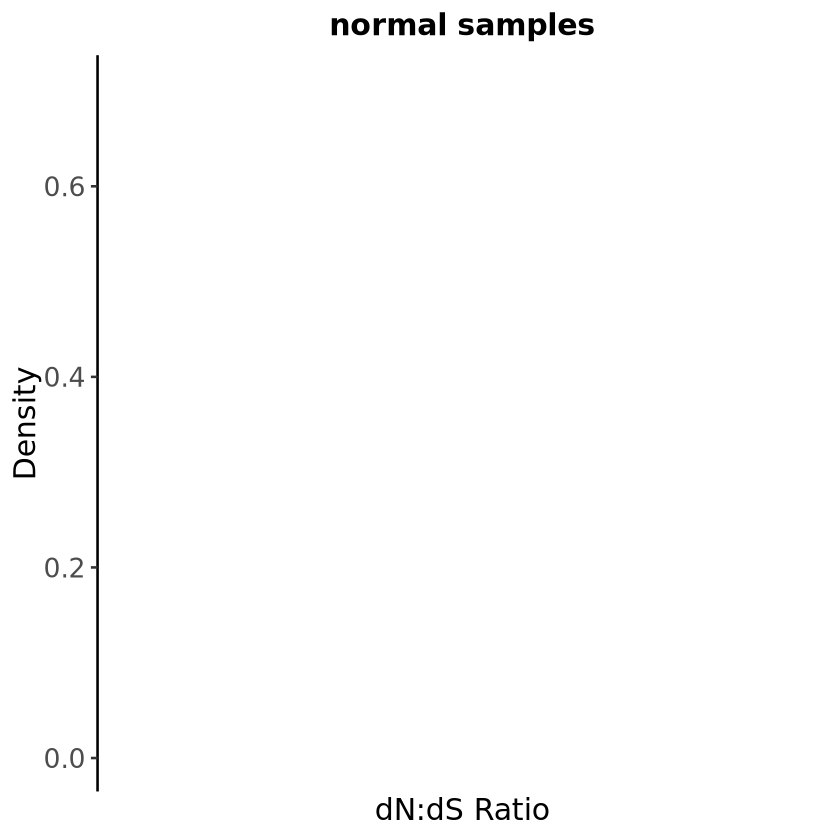

In [ ]:

p=ggplot(df_clean, aes(x = ratio)) +
  geom_density(alpha = 0.4) +
  scale_x_continuous(
    breaks = 1:2,  
    labels = c("0","1:1")
  ) +
  labs(
    title = "normal samples",
    x = "dN:dS Ratio",
    y = "Density"
  ) +
  theme_classic(base_size = 16) + 
  theme(
    axis.title = element_text(size = 18),
    axis.text = element_text(size = 16),
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5)
  )
  print(p)

In [ ]:

repeat_samples=read.table("Repeated mutations in tumor and adjacent.csv",sep=",",quote="\"",header=T)
only_common=read.table("only common 19 samples.csv",sep=",",quote="\"",header=T)

In [79]:
filtered <- repeat_samples[repeat_samples$ID %in% only_common$ID, ]

In [ ]:
common_data <- filtered[, c("ID","Sample", "class", "ExonicFunc.refGene")]

In [ ]:
result_common <- common_data %>%
  group_by(Sample,class) %>%
  summarise(
    nonsynonymous_count = sum(ExonicFunc.refGene == "nonsynonymous SNV", na.rm = TRUE),
    synonymous_count = sum(ExonicFunc.refGene == "synonymous SNV", na.rm = TRUE),
    ratio = nonsynonymous_count / synonymous_count
  )

`summarise()` has grouped output by 'Sample'. You can override using the
`.groups` argument.


In [ ]:
df_clean_common <- result_common %>%
  filter(!is.nan(ratio), !is.infinite(ratio))

summary(df_clean_common$ratio)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.5556  1.0833  1.4000  1.5321  2.0357  2.7500 

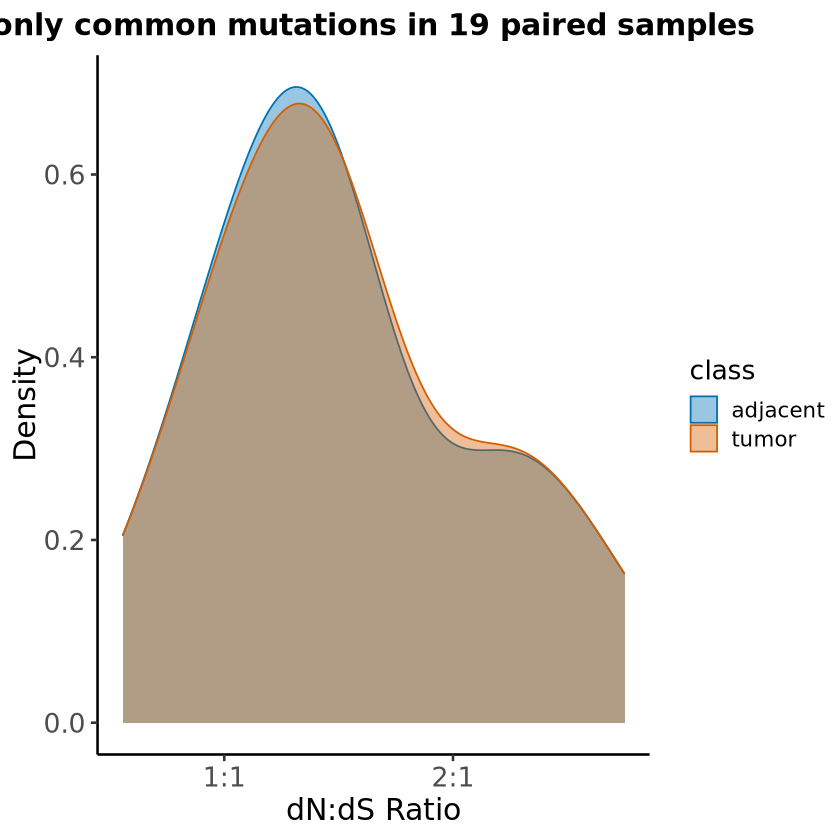

In [ ]:
p=ggplot(df_clean_common, aes(x = ratio, fill = class, color = class)) +
  geom_density(alpha = 0.4) +
  scale_color_manual(values = c("adjacent" = "#0072B2", "tumor" = "#D55E00")) +
  scale_fill_manual(values = c("adjacent" = "#0072B2", "tumor" = "#D55E00")) +
  scale_x_continuous(
    breaks = 0:3,  
    labels = c("0", "1:1", "2:1", "3:1")
  ) +
  labs(
    title = "only common mutations in 19 paired samples",
    x = "dN:dS Ratio",
    y = "Density"
  ) +
  theme_classic(base_size = 16) +  
  theme(
    axis.title = element_text(size = 18),
    axis.text = element_text(size = 16),
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5)
  )
  print(p)